In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-twiiter-data-in-text-format/india_tweets_data_april .csv
/kaggle/input/covid19-tweets/covid19_tweets.csv
/kaggle/input/all-city-name-in-india/in.csv


In [2]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob
import re
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Tweeter text data in World

In [3]:
df = pd.read_csv("../input/covid19-tweets/covid19_tweets.csv")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


## India geographical data

In [4]:
city = pd.read_csv("../input/all-city-name-in-india/in.csv")
city.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Delhi,28.6600,77.2300,India,IN,Delhi,admin,29617000.0,16753235.0
1,Mumbai,18.9667,72.8333,India,IN,Mahārāshtra,admin,23355000.0,12478447.0
2,Kolkāta,22.5411,88.3378,India,IN,West Bengal,admin,17560000.0,4496694.0
3,Bangalore,12.9699,77.5980,India,IN,Karnātaka,admin,13707000.0,8443675.0
4,Chennai,13.0825,80.2750,India,IN,Tamil Nādu,admin,11324000.0,6727000.0


### Cities in India

In [5]:
city_name = list(city['city'])
city_name

['Delhi',
 'Mumbai',
 'Kolkāta',
 'Bangalore',
 'Chennai',
 'Hyderābād',
 'Pune',
 'Ahmadābād',
 'Sūrat',
 'Lucknow',
 'Jaipur',
 'Cawnpore',
 'Mirzāpur',
 'Nāgpur',
 'Ghāziābād',
 'Indore',
 'Vadodara',
 'Vishākhapatnam',
 'Bhopāl',
 'Chinchvad',
 'Patna',
 'Ludhiāna',
 'Āgra',
 'Kalyān',
 'Madurai',
 'Jamshedpur',
 'Nāsik',
 'Farīdābād',
 'Aurangābād',
 'Rājkot',
 'Meerut',
 'Jabalpur',
 'Thāne',
 'Dhanbād',
 'Allahābād',
 'Vārānasi',
 'Srīnagar',
 'Amritsar',
 'Alīgarh',
 'Bhiwandi',
 'Gwalior',
 'Bhilai',
 'Hāora',
 'Rānchi',
 'Bezwāda',
 'Chandīgarh',
 'Mysore',
 'Raipur',
 'Kota',
 'Bareilly',
 'Jodhpur',
 'Coimbatore',
 'Dispur',
 'Guwāhāti',
 'Solāpur',
 'Trichinopoly',
 'Hubli',
 'Jalandhar',
 'Bhubaneshwar',
 'Bhayandar',
 'Morādābād',
 'Kolhāpur',
 'Thiruvananthapuram',
 'Sahāranpur',
 'Warangal',
 'Salem',
 'Mālegaon',
 'Kochi',
 'Gorakhpur',
 'Shimoga',
 'Tiruppūr',
 'Guntūr',
 'Raurkela',
 'Mangalore',
 'Nānded',
 'Cuttack',
 'Chānda',
 'Dehra Dūn',
 'Durgāpur',
 'Āsansol

### Extract India Twitter data using filter "city name"

In [6]:
rslt_df = df.loc[df['user_location'].isin(city_name)].reset_index(drop=True)
rslt_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DailyaddaaNews,New Delhi,Breaking news alerts from India.,2016-10-22 09:18:42,546,29,88,False,2020-07-25 12:26:46,Rajasthan Government today started a Plasma Ba...,NaN,Twitter Web App,False
1,TimesJobs,New Delhi,"TimesJobs is India’s leading #career portal, c...",2009-03-13 16:56:05,17848,1468,241,False,2020-07-25 12:21:37,#Virtual #CHRO #PanelDiscussion on Re-imaginin...,"['Virtual', 'CHRO', 'PanelDiscussion', 'workpl...",Twitter Web App,False
2,DailyaddaaNews,New Delhi,Breaking news alerts from India.,2016-10-22 09:18:42,546,29,88,False,2020-07-25 12:21:26,"1,142 #COVID19 positive cases, 2,137 patients ...",['COVID19'],Twitter Web App,False
3,ImmigrationExperts,Delhi,At http://t.co/IhBanNKJvg our mission is to pr...,2013-04-02 10:51:49,553,624,511,False,2020-07-25 12:15:43,🔴 Express Entry draw figures for the July 23 d...,NaN,Twitter Web App,False
4,punam nanda,Port Blair,A proud Islander who aspires to see India as t...,2012-06-24 16:44:42,337,356,3307,False,2020-07-25 12:15:21,Since #Andaman tourism isn’t opening &amp; the...,['Andaman'],Twitter for iPhone,False


## Sort the data on the basis of date

In [7]:
ind_tweets = rslt_df.sort_values(by='date').reset_index(drop=True)
ind_tweets

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Raviraj Mahajan,Mumbai,"Health & Fitness enthusiast, Entrepreneur, Foo...",2009-04-14 16:21:40,397,296,290,False,2020-07-25 00:30:18,#Food safety tips during #COVID19 pandemic. #C...,"['Food', 'COVID19', 'CORONAVIRUS', 'INDIAFIGHT...",Hootsuite Inc.,False
1,IndiaSpend,Mumbai,India's First & Most Extensive Data Journalism...,2011-03-30 16:32:40,57883,123,266,True,2020-07-25 00:35:00,“#COVID19 is weirder than any disease I have e...,['COVID19'],Sprout Social,False
2,Naveen Karthikeyan L,Puducherry,Textrovert\nLearner always\nVibrant Listener,2010-03-04 17:20:36,137,480,303,False,2020-07-25 00:39:09,Its been 6 months gone by #lockdown for us and...,['lockdown'],Twitter for Android,False
3,ChInKu_IyEnGaR🤍❤️🤍,Bangalore,"🇮🇳 INDIA Bhakt🇮🇳 filter kaapi ☕ Dog lover, Eng...",2009-08-18 16:56:15,620,1791,156768,False,2020-07-25 01:15:11,How many of you have your password set as #Cov...,"['Covid19', 'GoodMorning']",Twitter for Android,False
4,HTMumbai,Mumbai,One of India's largest media companies. Bringi...,2013-05-25 12:11:09,35337,516,186,True,2020-07-25 01:30:19,"Maharashtra #Covid19 toll crosses 13,000; tall...",['Covid19'],TweetDeck,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,PIB India,New Delhi,Press Information Bureau. Nodal agency for com...,2010-12-27 11:55:36,2112600,268,2149,True,2020-08-30 08:57:52,Vice President @MVenkaiahNaidu calls for speci...,['COVID19'],Twitter Web App,False
2329,Clover Infotech,Mumbai,Clover Infotech is a leading IT services and c...,2012-04-25 11:20:27,345,206,35,False,2020-08-30 08:59:47,"Lakshmi Mittra, Head - Clover Academy talks to...","['digitization', 'enterprises']",Twitter Web App,False
2330,The New Indian Express,Chennai,All the tweets for breaking news & views.\nFac...,2009-12-05 09:24:55,451006,551,542,True,2020-08-30 09:02:00,@TheMornStandard @SumiSukanya Emergency ambula...,NaN,Twitter Web App,False
2331,The Times Of India,New Delhi,News. Views. Analysis. Conversations. India’s ...,2010-04-19 10:50:15,13057016,506,5,True,2020-08-30 09:02:19,#COVID19 LIVE | Lata Mangeshkar's building get...,['COVID19'],TweetDeck,False


## Take the only usefull columns

In [8]:
ind_tweets = ind_tweets[['date', 'text']]
ind_tweets.head()

,date,text
0,2020-07-25 00:30:18,#Food safety tips during #COVID19 pandemic. #C...
1,2020-07-25 00:35:00,“#COVID19 is weirder than any disease I have e...
2,2020-07-25 00:39:09,Its been 6 months gone by #lockdown for us and...
3,2020-07-25 01:15:11,How many of you have your password set as #Cov...
4,2020-07-25 01:30:19,"Maharashtra #Covid19 toll crosses 13,000; tall..."


### Load April data

In [9]:
apl = pd.read_csv("../input/india-twiiter-data-in-text-format/india_tweets_data_april .csv")
apl.head()

,date,text
0,2020-04-01T00:06:29Z,"Online training for 25,000 doctors to begin ht..."
1,2020-04-01T00:08:37Z,"#Coronavirus: #WhiteHouse projects 100,000 to ..."
2,2020-04-01T00:28:30Z,#Coronavirus | Three quasi-subspecies of virus...
3,2020-04-01T00:29:37Z,From a doctor friend treating #COVID19 patient...
4,2020-04-01T00:29:55Z,Fourth #COVID19 positive case in Odisha \n\n29...


In [10]:
apl['date'] = apl['date'].str.replace('T',' ')
apl['date'] = apl['date'].str.replace('Z',' ')
apl.head()

,date,text
0,2020-04-01 00:06:29,"Online training for 25,000 doctors to begin ht..."
1,2020-04-01 00:08:37,"#Coronavirus: #WhiteHouse projects 100,000 to ..."
2,2020-04-01 00:28:30,#Coronavirus | Three quasi-subspecies of virus...
3,2020-04-01 00:29:37,From a doctor friend treating #COVID19 patient...
4,2020-04-01 00:29:55,Fourth #COVID19 positive case in Odisha \n\n29...


In [11]:
apl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1500 non-null   object
 1   text    1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB


In [12]:
ind_tweets = pd.concat([ind_tweets,apl]).reset_index(drop=True)
ind_tweets.head()

,date,text
0,2020-07-25 00:30:18,#Food safety tips during #COVID19 pandemic. #C...
1,2020-07-25 00:35:00,“#COVID19 is weirder than any disease I have e...
2,2020-07-25 00:39:09,Its been 6 months gone by #lockdown for us and...
3,2020-07-25 01:15:11,How many of you have your password set as #Cov...
4,2020-07-25 01:30:19,"Maharashtra #Covid19 toll crosses 13,000; tall..."


In [13]:
ind_tweets['date'] = pd.to_datetime(ind_tweets['date'], utc=True)
ind_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3833 entries, 0 to 3832
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    3833 non-null   datetime64[ns, UTC]
 1   text    3833 non-null   object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 60.0+ KB


## data preprocessing

In [14]:
for i in range(ind_tweets.shape[0]):
    ind_tweets['text'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", ind_tweets['text'][i]).split()).lower()
    
ind_tweets['text'].head()

0    food safety tips during covid19 pandemic coron...
1    covid19 is weirder than any disease i have eve...
2    its been 6 months gone by lockdown for us and ...
3    how many of you have your password set as covi...
4    maharashtra covid19 toll crosses 13 000 tally ...
Name: text, dtype: object

## Null values

In [15]:
ind_tweets.isnull().sum()

date    0
text    0
dtype: int64

### WordCloud in April

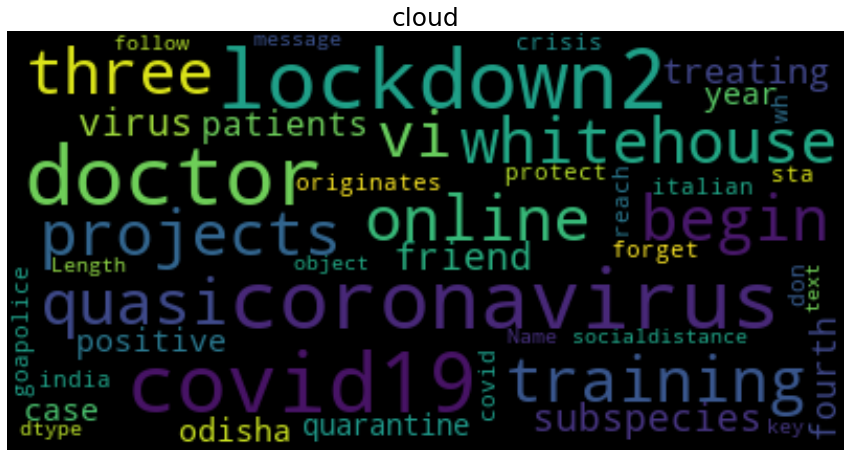

In [16]:
ap_tweet = ind_tweets[ind_tweets['date']<"2020-07-01"]['text']
wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=200,
                      max_font_size=40).generate(str(ap_tweet))
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.title('cloud', size = 25)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### WordCloud in July

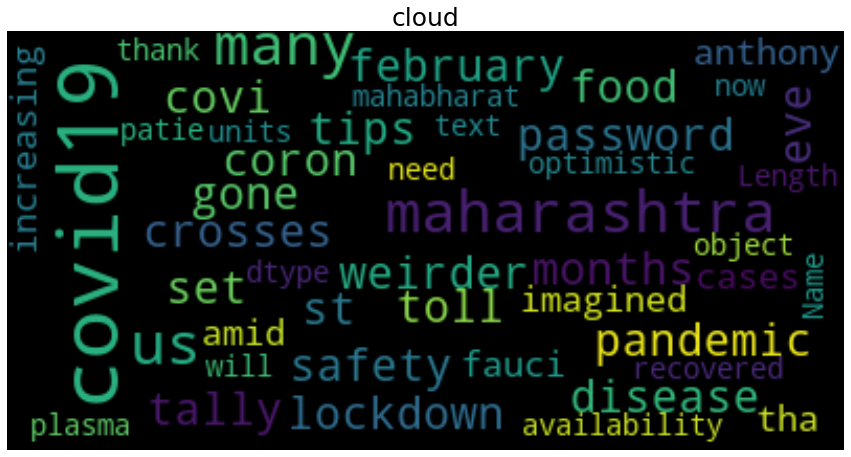

In [17]:
# tweets in 7 month
sv_tweet = ind_tweets[(ind_tweets['date']<"2020-08-01") & (ind_tweets['date']>"2020-07-01")]['text']
wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=200,
                      max_font_size=40).generate(str(sv_tweet))
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.title('cloud', size = 25)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### WordCloud in August

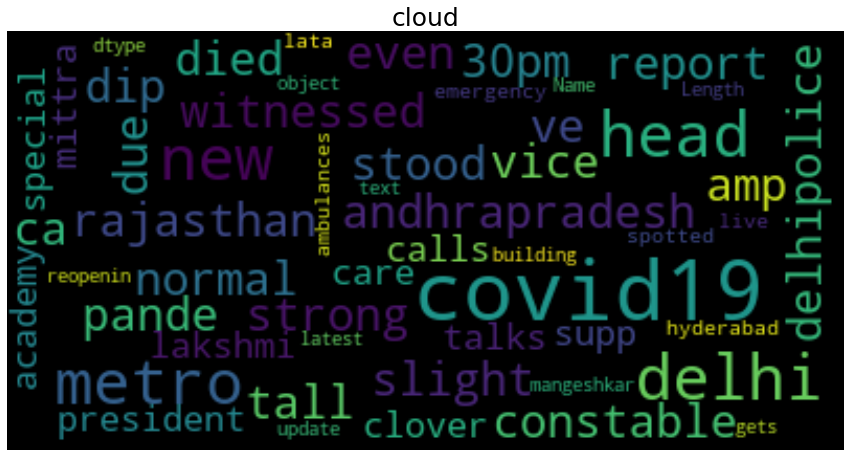

In [18]:
# tweets in 8 month
ei_tweet = ind_tweets[ind_tweets['date']>="2020-08-01"]['text']
wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=200,
                      max_font_size=40).generate(str(ei_tweet))
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.title('cloud', size = 25)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Stopwords

In [19]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

### Removing stopwords in the tweets data

In [20]:
ind_tweets['text'] = ind_tweets['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stopwords]))
ind_tweets['text'].head() 

0    food safety tips covid19 pandemic coronavirus ...
1    covid19 weirder disease come across lasts long...
2    6 months gone lockdown us living without hope ...
3                many password set covid19 goodmorning
4    maharashtra covid19 toll crosses 13 000 tally ...
Name: text, dtype: object

# Sentiment Analysis

In [21]:
ind_tweets['sentiment'] = ' '
for i,tweets in enumerate(ind_tweets.text) :
    blob = TextBlob(tweets)
    if blob.sentiment.polarity > 0 :
        ind_tweets['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        ind_tweets['sentiment'][i] = 'negative'
    else :
        ind_tweets['sentiment'][i] = 'neutral'
        
ind_tweets.head()

,date,text,sentiment
0,2020-07-25 00:30:18+00:00,food safety tips covid19 pandemic coronavirus ...,neutral
1,2020-07-25 00:35:00+00:00,covid19 weirder disease come across lasts long...,neutral
2,2020-07-25 00:39:09+00:00,6 months gone lockdown us living without hope ...,positive
3,2020-07-25 01:15:11+00:00,many password set covid19 goodmorning,positive
4,2020-07-25 01:30:19+00:00,maharashtra covid19 toll crosses 13 000 tally ...,neutral


#### Positive words cloud in entire Dataset

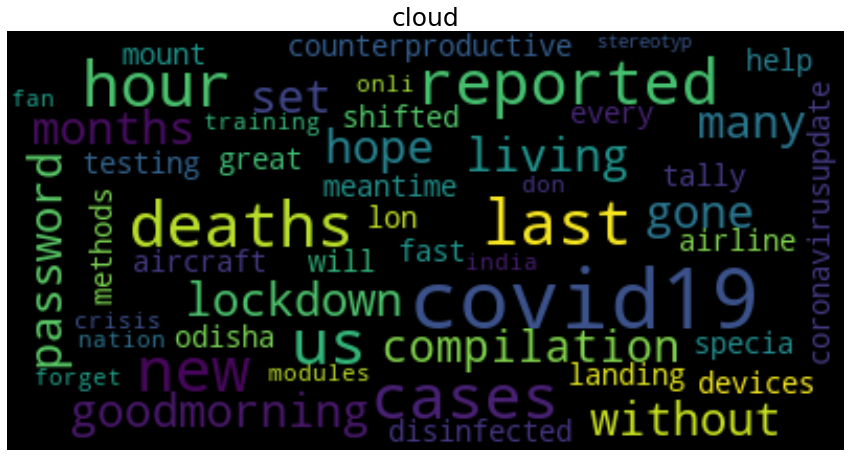

In [22]:
pos_tweet = ind_tweets[ind_tweets['sentiment']=='positive']['text']
wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=50,
                      max_font_size=40).generate(str(pos_tweet))
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.title('cloud', size = 25)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#### Negative words cloud in entire Dataset

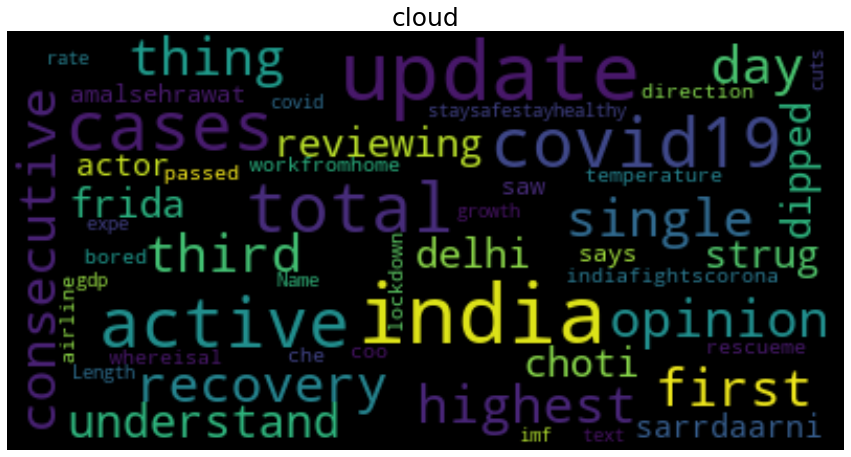

In [23]:
neg_tweet = ind_tweets[ind_tweets['sentiment']=='negative']['text']
wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=50,
                      max_font_size=40).generate(str(neg_tweet))
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.title('cloud', size = 25)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#### Neutral words cloud in entire Dataset

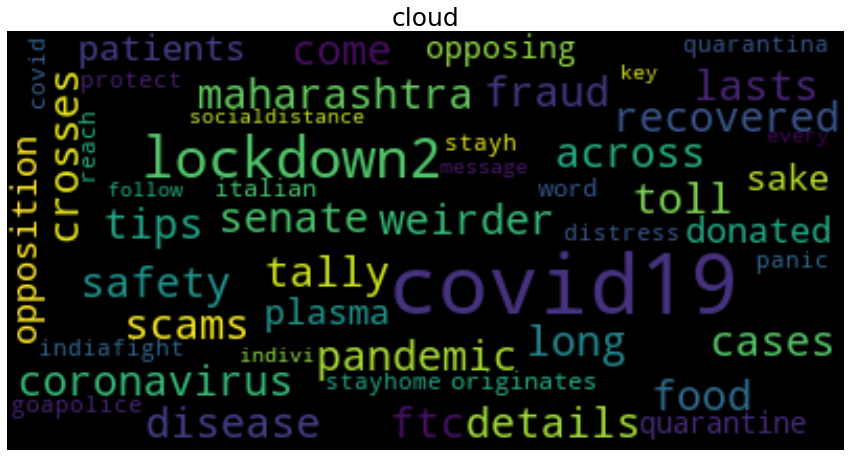

In [24]:
net_tweet = ind_tweets[ind_tweets['sentiment']=='neutral']['text']
wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=50,
                      max_font_size=40).generate(str(net_tweet))
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.title('cloud', size = 25)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### Sentiment plot in April

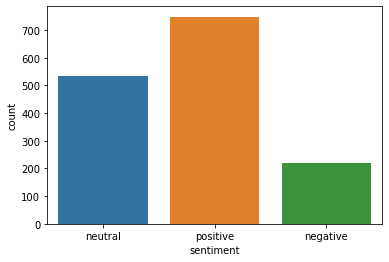

In [25]:
order=["neutral","positive","negative"]
sns.countplot(ind_tweets[ind_tweets['date']<"2020-07-01"]['sentiment'], order=order)

### Sentiment plot in July

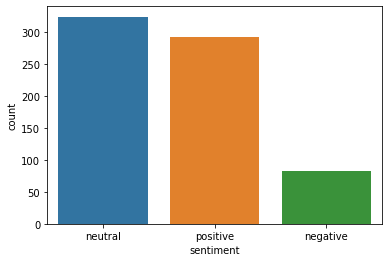

In [26]:
sns.countplot(ind_tweets[(ind_tweets['date']<"2020-08-01") & (ind_tweets['date']>"2020-07-01")]['sentiment'], order=order)

### Sentiment plot in August

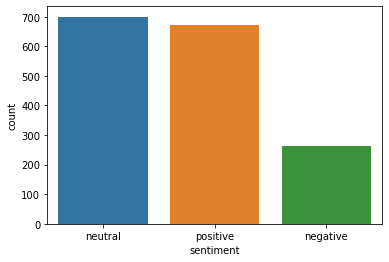

In [27]:
sns.countplot(ind_tweets[ind_tweets['date']>="2020-08-01"]['sentiment'], order=order)

## Sentiment group analysis

In [28]:
df = ind_tweets[['date','sentiment']].copy()
df['month'] = df['date'].dt.month
df['month'] = df['month'].map({4:'April', 7:'July', 8:'August'})
a = df.reset_index().groupby(['month', 'sentiment'])['date'].count()

In [29]:
a = a.unstack().reindex(["April","July","August"])
a

sentiment,negative,neutral,positive
month,,,
April,218,534,748
July,82,324,292
August,264,700,671


In [30]:
cols = ['negative','neutral','positive']
a[cols] = a[cols].div(a[cols].sum(axis=1), axis=0).multiply(100)

In [31]:
a

sentiment,negative,neutral,positive
month,,,
April,14.533333,35.600000,49.866667
July,11.747851,46.418338,41.833811
August,16.146789,42.813456,41.039755


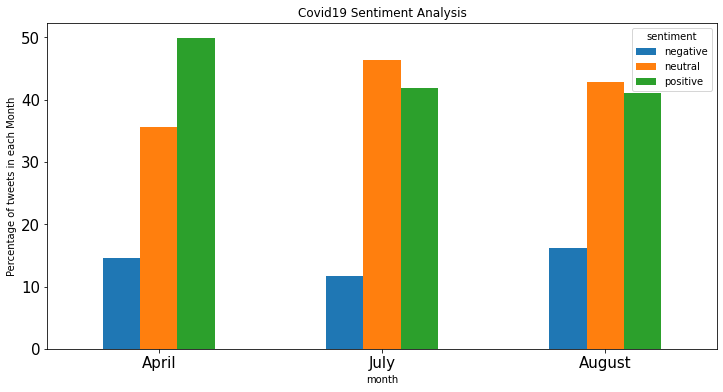

In [32]:
a.plot.bar(title='Covid19 Sentiment Analysis', ylabel="Percentage of tweets in each Month",
           figsize=(12,6), rot=0,fontsize=15)

In [33]:
b = df.reset_index().groupby(['sentiment', 'month'])['sentiment'].count().unstack()
cols = ["April","July","August"]
b = b[cols]
b = b[cols].div(b[cols].sum(axis=0), axis=1).multiply(100)

In [34]:
b

month,April,July,August
sentiment,,,
negative,14.533333,11.747851,16.146789
neutral,35.600000,46.418338,42.813456
positive,49.866667,41.833811,41.039755


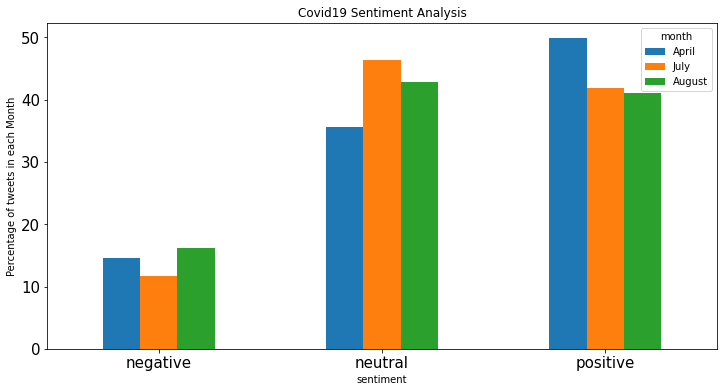

In [35]:
b.plot.bar(title='Covid19 Sentiment Analysis',  ylabel="Percentage of tweets in each Month",
           figsize=(12,6), rot=0, fontsize=15)